<a href="https://colab.research.google.com/github/mohammadrezaghorvei/reza/blob/master/maghaleA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from tensorflow import feature_column as fc
from tensorflow.python.keras.datasets import cifar10,cifar100
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.layers import Input,Dense,Conv1D,MaxPooling1D,Flatten,Reshape,UpSampling1D
from scipy.io import loadmat
from tensorflow.python.keras.optimizers import Adam
import os
from sklearn.manifold import TSNE
from keras import utils
from sklearn.decomposition import PCA
import cv2
from sklearn.model_selection import train_test_split 
import pywt
from tensorflow.keras.applications import InceptionV3,ResNet50,VGG19,DenseNet201,NASNetLarge,InceptionResNetV2,ResNet152V2,EfficientNetB7,VGG16,Xception,MobileNetV2,ResNet152V2
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
#from sklearn.cross_validation import KFold
from sklearn.ensemble import BaggingClassifier
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
from packaging.version import parse
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sb
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model A data set A

In [ ]:
x_train=np.load('/content/drive/My Drive/datasets/dataseta/xtrain.npy')
y_train=np.load('/content/drive/My Drive/datasets/dataseta/ytrain.npy')
x_test=np.load('/content/drive/My Drive/datasets/dataseta/xtest.npy')
y_test=np.load('/content/drive/My Drive/datasets/dataseta/ytest.npy')

In [ ]:
finalscores=[]

In [ ]:
model =DenseNet201(include_top=False,weights='imagenet',input_shape=(224,224,3))
x = model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dense(10,activation='softmax')(x)
model2 = tf.keras.models.Model(inputs=model.input, outputs=x)
for layer in model2.layers[:-3]:
  layer.trainable = False
model2.summary()
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') == 1):
      if(logs.get('val_accuracy') == 1):
        self.model.stop_training = True
callbacks = [myCallback()]
history=model2.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),shuffle=True,callbacks=callbacks)
q=model2.predict(x_test)
yhat=np.argmax(q,axis=1)
y=np.argmax(y_test,axis=1)
plt.plot(history.history['accuracy'],marker='+',c='red')
plt.plot(history.history['loss'],marker='+',c='blue')
plt.plot(history.history['val_accuracy'],marker='+',c='green')
plt.plot(history.history['val_loss'],marker='+',c='orange')
plt.legend(['acc','loss','val_acc','val_loss'])
plt.show()
scores=f1_score(yhat,y,average='micro')
finalscores.append(scores)

In [ ]:
model =DenseNet201(include_top=False,weights='imagenet',input_shape=(224,224,3))
x = model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
model3 = tf.keras.models.Model(inputs=model.input, outputs=x)
for layer in model3.layers[:]:
  layer.trainable = False
model3.summary()

In [ ]:
from tensorflow.python.keras import backend as k

In [ ]:
import tensorflow as tf

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
output_fn = k.function([model3.input], [model3.output])

In [ ]:
output_image = output_fn(x_train)

In [ ]:
k.learning_phase()

<function tensorflow.python.keras.backend.learning_phase>

In [ ]:
fn = k.function([model3.input,k.learning_phase()], [model3.output])

ValueError: ignored

In [ ]:
from tensorflow.python.keras.backend import eager_learning_phase_scope

In [ ]:
with eager_learning_phase_scope(value=0):
    output_test = fn([x_test])

In [ ]:
output_test[0].shape

In [ ]:
k.function([model3.input , k.learning_phase_scope(0)],model3.output)

ValueError: ignored

In [ ]:
with eager_learning_phase_scope(value=1):
    output_train = fn([x_train])

In [ ]:
output_train = model3([x_train], training=True) 
output_test= model3([x_train], training=False)

In [ ]:
names=['linear', 'poly', 'rbf', 'sigmoid',]
scores=[]
for i in names: 
  clf=SVC(kernel=i,gamma='auto',probability=True,C=1)
  prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
  prediction=np.argmax(prediction,axis=1)
  scores.append(f1_score(prediction,y_testnew,average='micro'))

finalscores.append(np.max(scores))

In [ ]:
names=['gini','entropy']
scores=[]
for i in names:
  for j in np.arange(1,41):
    decisiontree = DecisionTreeClassifier(criterion=i,random_state=0, max_depth=j) 
    prediction = decisiontree.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
    prediction=np.argmax(prediction,axis=1)
    scores.append(f1_score(prediction,y_testnew,average='micro'))
finalscores.append(np.max(scores))


In [ ]:
names=['newton-cg', 'sag', 'saga' , 'lbfgs']
scores=[]
for i in names:
  clf=LogisticRegression(solver=i,class_weight='balanced', max_iter=1000)
  prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
  prediction=np.argmax(prediction,axis=1)
  scores.append(f1_score(prediction,y_testnew,average='micro'))

finalscores.append(np.max(scores))

In [ ]:
algorithm=['ball_tree', 'kd_tree', 'brute']
scores=[]
for i in algorithm:
  for j in np.arange(1,50):
    clf = KNeighborsClassifier(j, p=2,metric='minkowski',algorithm=i)
    prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
    prediction =np.argmax(prediction,axis=1)
    scores.append(f1_score(prediction,y_testnew,average='micro'))
finalscores.append(np.max(scores))


In [ ]:
finalscores

[1.0, 1.0, 0.974, 0.998, 0.98]

In [ ]:
from tabulate import tabulate
table = [["FC", finalscores[0]*100], ["svm", finalscores[1]*100], ["DT", finalscores[2]*100], ["LR", finalscores[3]*100], ["KN", finalscores[4]*100]]
headers = ["dataseta","DenseNet201"]
print(tabulate(table, headers,tablefmt='grid'))
finalscores=np.array(finalscores)
np.save('finalscores_dataset[A]',finalscores)
!cp finalscores_dataset[A].npy "/content/drive/My Drive/result/modela"



+------------+---------------+
| dataseta   |   DenseNet201 |
+============+===============+
| FC         |         100   |
+------------+---------------+
| svm        |         100   |
+------------+---------------+
| DT         |          97.4 |
+------------+---------------+
| LR         |          99.8 |
+------------+---------------+
| KN         |          98   |
+------------+---------------+


MODEL A DATA SET B

In [ ]:
x_train=np.load('/content/drive/My Drive/datasets/datasetb/xtrain.npy')
y_train=np.load('/content/drive/My Drive/datasets/dataseta/ytrain.npy')
x_test=np.load('/content/drive/My Drive/datasets/datasetb/xtest.npy')
y_test=np.load('/content/drive/My Drive/datasets/dataseta/ytest.npy')

In [ ]:
finalscores=[]

In [ ]:
model =DenseNet201(include_top=False,weights='imagenet',input_shape=(224,224,3))
x = model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dense(10,activation='softmax')(x)
model2 = tf.keras.models.Model(inputs=model.input, outputs=x)
for layer in model2.layers[:-3]:
  layer.trainable = False
model2.summary()
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') == 1):
      if(logs.get('val_accuracy') == 1):
        self.model.stop_training = True
callbacks = [myCallback()]
history=model2.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),shuffle=True,callbacks=callbacks)
q=model2.predict(x_test)
yhat=np.argmax(q,axis=1)
y=np.argmax(y_test,axis=1)
plt.plot(history.history['accuracy'],marker='+',c='red')
plt.plot(history.history['loss'],marker='+',c='blue')
plt.plot(history.history['val_accuracy'],marker='+',c='green')
plt.plot(history.history['val_loss'],marker='+',c='orange')
plt.legend(['acc','loss','val_acc','val_loss'])
plt.show()
scores=f1_score(yhat,y,average='micro')
finalscores.append(scores)

In [ ]:
model =DenseNet201(include_top=False,weights='imagenet',input_shape=(224,224,3))
x = model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
model3 = tf.keras.models.Model(inputs=model.input, outputs=x)
for layer in model3.layers[:]:
  layer.trainable = False
model3.summary()

In [ ]:
y_trainnew=np.argmax(y_train,axis=1)
xtrainnew=model3.predict(x_train)
y_testnew=np.argmax(y_test,axis=1)
xtestnew=model3.predict(x_test)

In [ ]:
names=['linear', 'poly', 'rbf', 'sigmoid',]
scores=[]
for i in names: 
  clf=SVC(kernel=i,gamma='auto',probability=True,C=1)
  prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
  prediction=np.argmax(prediction,axis=1)
  scores.append(f1_score(prediction,y_testnew,average='micro'))

finalscores.append(np.max(scores))

In [ ]:
names=['gini','entropy']
scores=[]
for i in names:
  for j in np.arange(1,41):
    decisiontree = DecisionTreeClassifier(criterion=i,random_state=0, max_depth=j) 
    prediction = decisiontree.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
    prediction=np.argmax(prediction,axis=1)
    scores.append(f1_score(prediction,y_testnew,average='micro'))
finalscores.append(np.max(scores))

KeyboardInterrupt: ignored

In [ ]:
names=['newton-cg', 'sag', 'saga' , 'lbfgs']
scores=[]
for i in names:
  clf=LogisticRegression(solver=i,class_weight='balanced', max_iter=1000)
  prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
  prediction=np.argmax(prediction,axis=1)
  scores.append(f1_score(prediction,y_testnew,average='micro'))

finalscores.append(np.max(scores))

In [ ]:
algorithm=['ball_tree', 'kd_tree', 'brute']
scores=[]
for i in algorithm:
  for j in np.arange(1,50):
    clf = KNeighborsClassifier(j, p=2,metric='minkowski',algorithm=i)
    prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
    prediction =np.argmax(prediction,axis=1)
    scores.append(f1_score(prediction,y_testnew,average='micro'))
finalscores.append(np.max(scores))

In [ ]:
from tabulate import tabulate
table = [["FC", finalscores[0]*100], ["svm", finalscores[1]*100], ["DT", finalscores[2]*100], ["LR", finalscores[3]*100], ["KN", finalscores[4]*100]]
headers = ["dataseta","DenseNet201"]
print(tabulate(table, headers,tablefmt='grid'))
np.save('finalscores_dataset[B]',finalscores)
!cp finalscores_dataset[B].npy "/content/drive/My Drive/result/modela"

+------------+---------------+
| dataseta   |   DenseNet201 |
+============+===============+
| FC         |          99.6 |
+------------+---------------+
| svm        |          99   |
+------------+---------------+
| DT         |          96.8 |
+------------+---------------+
| LR         |          99.2 |
+------------+---------------+
| KN         |          98   |
+------------+---------------+


MODEL A data set c

In [ ]:
x_train=np.load('/content/drive/My Drive/datasets/datasetc/xtrain.npy')
y_train=np.load('/content/drive/My Drive/datasets/dataseta/ytrain.npy')
x_test=np.load('/content/drive/My Drive/datasets/datasetc/xtest.npy')
y_test=np.load('/content/drive/My Drive/datasets/dataseta/ytest.npy')

In [ ]:
finalscores=[]

20/20 [==============================] - 10s 488ms/step - loss: 0.7043 - accuracy: 0.7924 - val_loss: 0.1140 - val_accuracy: 0.9760
Epoch 2/50
20/20 [==============================] - 7s 338ms/step - loss: 0.0720 - accuracy: 0.9788 - val_loss: 0.0282 - val_accuracy: 0.9960
Epoch 3/50
20/20 [==============================] - 7s 339ms/step - loss: 0.0216 - accuracy: 0.9960 - val_loss: 0.0179 - val_accuracy: 0.9960
Epoch 4/50
20/20 [==============================] - 7s 339ms/step - loss: 0.0175 - accuracy: 0.9964 - val_loss: 0.0438 - val_accuracy: 0.9820
Epoch 5/50
20/20 [==============================] - 7s 340ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 7s 338ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000


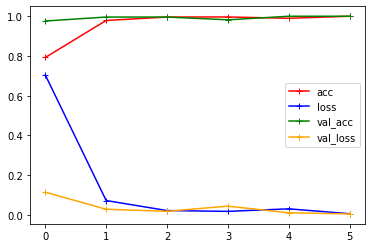

In [ ]:
model =DenseNet201(include_top=False,weights='imagenet',input_shape=(224,224,3))
x = model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dense(10,activation='softmax')(x)
model2 = tf.keras.models.Model(inputs=model.input, outputs=x)
for layer in model2.layers[:-3]:
  layer.trainable = False
model2.summary()
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') == 1):
      if(logs.get('val_accuracy') == 1):
        self.model.stop_training = True
callbacks = [myCallback()]
history=model2.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),shuffle=True,callbacks=callbacks)
q=model2.predict(x_test)
yhat=np.argmax(q,axis=1)
y=np.argmax(y_test,axis=1)
plt.plot(history.history['accuracy'],marker='+',c='red')
plt.plot(history.history['loss'],marker='+',c='blue')
plt.plot(history.history['val_accuracy'],marker='+',c='green')
plt.plot(history.history['val_loss'],marker='+',c='orange')
plt.legend(['acc','loss','val_acc','val_loss'])
plt.show()
scores=f1_score(yhat,y,average='micro')
finalscores.append(scores)

In [ ]:
y_trainnew=np.argmax(y_train,axis=1)
xtrainnew=model3.predict(x_train)
y_testnew=np.argmax(y_test,axis=1)
xtestnew=model3.predict(x_test)

In [ ]:
names=['linear', 'poly', 'rbf', 'sigmoid',]
scores=[]
for i in names: 
  clf=SVC(kernel=i,gamma='auto',probability=True,C=1)
  prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
  prediction=np.argmax(prediction,axis=1)
  scores.append(f1_score(prediction,y_testnew,average='micro'))

finalscores.append(np.max(scores))

In [ ]:
names=['gini','entropy']
scores=[]
for i in names:
  for j in np.arange(1,41):
    decisiontree = DecisionTreeClassifier(criterion=i,random_state=0, max_depth=j) 
    prediction = decisiontree.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
    prediction=np.argmax(prediction,axis=1)
    scores.append(f1_score(prediction,y_testnew,average='micro'))
finalscores.append(np.max(scores))

In [ ]:
names=['newton-cg', 'sag', 'saga' , 'lbfgs']
scores=[]
for i in names:
  clf=LogisticRegression(solver=i,class_weight='balanced', max_iter=1000)
  prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
  prediction=np.argmax(prediction,axis=1)
  scores.append(f1_score(prediction,y_testnew,average='micro'))

finalscores.append(np.max(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
algorithm=['ball_tree', 'kd_tree', 'brute']
scores=[]
for i in algorithm:
  for j in np.arange(1,50):
    clf = KNeighborsClassifier(j, p=2,metric='minkowski',algorithm=i)
    prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
    prediction =np.argmax(prediction,axis=1)
    scores.append(f1_score(prediction,y_testnew,average='micro'))
finalscores.append(np.max(scores))

In [ ]:
from tabulate import tabulate
table = [["FC", finalscores[0]*100], ["svm", finalscores[1]*100], ["DT", finalscores[2]*100], ["LR", finalscores[3]*100], ["KN", finalscores[4]*100]]
headers = ["dataseta","DenseNet201"]
print(tabulate(table, headers,tablefmt='grid'))

+------------+---------------+
| dataseta   |   DenseNet201 |
+============+===============+
| FC         |         100   |
+------------+---------------+
| svm        |         100   |
+------------+---------------+
| DT         |          98.2 |
+------------+---------------+
| LR         |         100   |
+------------+---------------+
| KN         |          99.4 |
+------------+---------------+


In [ ]:
np.save('finalscores_dataset[c]',finalscores)
!cp finalscores_dataset[c].npy "/content/drive/My Drive/result/modela"

model a data set D

In [ ]:
x_train=np.load('/content/drive/My Drive/datasets/datasetd/xtrain.npy')
y_train=np.load('/content/drive/My Drive/datasets/dataseta/ytrain.npy')
x_test=np.load('/content/drive/My Drive/datasets/datasetd/xtest.npy')
y_test=np.load('/content/drive/My Drive/datasets/dataseta/ytest.npy')

In [ ]:
finalscores=[]

In [ ]:
model =DenseNet201(include_top=False,weights='imagenet',input_shape=(224,224,3))
x = model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dense(10,activation='softmax')(x)
model2 = tf.keras.models.Model(inputs=model.input, outputs=x)
for layer in model2.layers[:-3]:
  layer.trainable = False
model2.summary()
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') == 1):
      if(logs.get('val_accuracy') == 1):
        self.model.stop_training = True
callbacks = [myCallback()]
history=model2.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),shuffle=True,callbacks=callbacks)
q=model2.predict(x_test)
yhat=np.argmax(q,axis=1)
y=np.argmax(y_test,axis=1)
plt.plot(history.history['accuracy'],marker='+',c='red')
plt.plot(history.history['loss'],marker='+',c='blue')
plt.plot(history.history['val_accuracy'],marker='+',c='green')
plt.plot(history.history['val_loss'],marker='+',c='orange')
plt.legend(['acc','loss','val_acc','val_loss'])
plt.show()
scores=f1_score(yhat,y,average='micro')
finalscores.append(scores)

In [ ]:
model =DenseNet201(include_top=False,weights='imagenet',input_shape=(224,224,3))
x = model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
model3 = tf.keras.models.Model(inputs=model.input, outputs=x)
for layer in model3.layers[:]:
  layer.trainable = False
model3.summary()

In [ ]:
y_trainnew=np.argmax(y_train,axis=1)
xtrainnew=model3.predict(x_train)
y_testnew=np.argmax(y_test,axis=1)
xtestnew=model3.predict(x_test)

In [ ]:
names=['linear', 'poly', 'rbf', 'sigmoid',]
scores=[]
for i in names: 
  clf=SVC(kernel=i,gamma='auto',probability=True,C=1)
  prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
  prediction=np.argmax(prediction,axis=1)
  scores.append(f1_score(prediction,y_testnew,average='micro'))

finalscores.append(np.max(scores))

In [ ]:
names=['gini','entropy']
scores=[]
for i in names:
  for j in np.arange(1,41):
    decisiontree = DecisionTreeClassifier(criterion=i,random_state=0, max_depth=j) 
    prediction = decisiontree.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
    prediction=np.argmax(prediction,axis=1)
    scores.append(f1_score(prediction,y_testnew,average='micro'))
finalscores.append(np.max(scores)) 

In [ ]:
names=['newton-cg', 'sag', 'saga' , 'lbfgs']
scores=[]
for i in names:
  clf=LogisticRegression(solver=i,class_weight='balanced', max_iter=1000)
  prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
  prediction=np.argmax(prediction,axis=1)
  scores.append(f1_score(prediction,y_testnew,average='micro'))

finalscores.append(np.max(scores))

In [ ]:
algorithm=['ball_tree', 'kd_tree', 'brute']
scores=[]
for i in algorithm:
  for j in np.arange(1,50):
    clf = KNeighborsClassifier(j, p=2,metric='minkowski',algorithm=i)
    prediction = clf.fit(xtrainnew,y_trainnew).predict_proba(xtestnew)
    prediction =np.argmax(prediction,axis=1)
    scores.append(f1_score(prediction,y_testnew,average='micro'))
finalscores.append(np.max(scores))

In [ ]:
from tabulate import tabulate
table = [["FC", finalscores[0]*100], ["svm", finalscores[1]*100], ["DT", finalscores[2]*100], ["LR", finalscores[3]*100], ["KN", finalscores[4]*100]]
headers = ["dataseta","DenseNet201"]
print(tabulate(table, headers,tablefmt='grid'))

+------------+---------------+
| dataseta   |   DenseNet201 |
+============+===============+
| FC         |         100   |
+------------+---------------+
| svm        |         100   |
+------------+---------------+
| DT         |          98   |
+------------+---------------+
| LR         |          99.8 |
+------------+---------------+
| KN         |          99.4 |
+------------+---------------+


In [ ]:
np.save('finalscores_dataset[D]',finalscores)
!cp finalscores_dataset[D].npy "/content/drive/My Drive/result/modela"